In [38]:
%%bash
echo $CMSSW_BASE
echo $PWD

/afs/cern.ch/work/i/innocent/public/code/s7/CMSSW_9_3_0_pre2
/afs/cern.ch/user/i/innocent/POS2017/exercise2_TkHistos


In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [40]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [41]:
from DataFormats.FWLite import Handle, Events

In [42]:
#LS50
#events = Events("root://cms-xrd-global.cern.ch///store/data/Run2016H/JetHT/AOD/PromptReco-v2/000/283/408/00000/AE49FDAB-8398-E611-9B98-02163E014388.root")
#LS1000
#events = Events("root://cms-xrd-global.cern.ch///store/data/Run2016H/JetHT/AOD/PromptReco-v2/000/283/408/00000/88FB6BA5-7B98-E611-B25E-FA163EE1CC08.root")

events = Events("root://cms-xrd-global.cern.ch///store/data/Run2017B/SingleMuon/AOD/PromptReco-v2/000/299/061/00000/5C4984B0-B86A-E711-837F-02163E01A792.root")

tracks = Handle("std::vector<reco::Track>")
label = "generalTracks"
quality = "highPurity"

nt = []
for i in range(0,1000) : # events.size()):
  a= events.to(i)
  if (i%500==0) : print "Event", i 
  a=events.getByLabel(label, tracks)
  nt.append(tracks.product().size())
print len(nt)

Event 0
Event 500
1000


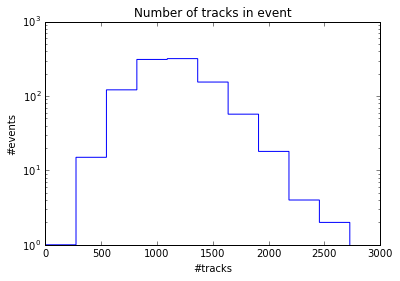

In [43]:
fig, ax = plt.subplots()
ax.hist(nt,histtype='step', fill=False)
ax.set_title('Number of tracks in event')
ax.set_xlabel('#tracks')
ax.set_ylabel('#events')
plt.yscale('log', nonposy='clip')
plt.show()

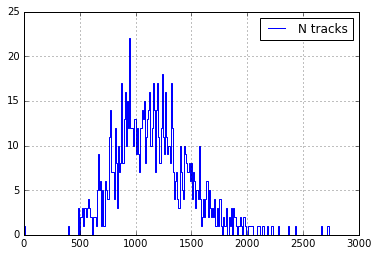

In [44]:
y,x = np.histogram(nt,np.linspace(0.,3000.,300))
y.resize(len(x))
plt.step(x,y,where='post',label='N tracks')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

In [45]:
tkParsA = []
tkHitsA = []
for i in range(0,2000) : # events.size()):
  a= events.to(i)
  if (i%500==0) : print "Event", i 
  a=events.getByLabel(label, tracks)
  for tk in tracks.product() :
    if (not tk.quality(tk.qualityByName(quality))) : continue
    pattern = tk.hitPattern()
    tkParsA.append([tk.eta(),tk.phi(),tk.pt(),pattern.numberOfValidHits(),pattern.numberOfValidPixelHits(),tk.ndof(),tk.chi2(),tk.originalAlgo()-4])
    tkHitsA.append([pattern.getTrackerLayerCase(0,1,1), pattern.getTrackerLayerCase(1,1,1),pattern.getTrackerLayerCase(0,1,2), pattern.getTrackerLayerCase(1,1,2)])
print len(tkParsA)

Event 0
Event 500
Event 1000
Event 1500
1805362


In [46]:
tkPars = np.array(zip(*tkParsA))
print len(tkPars)
tkHits = np.array(zip(*tkHitsA))
print len(tkHits)

8
4


8.0 0 999999

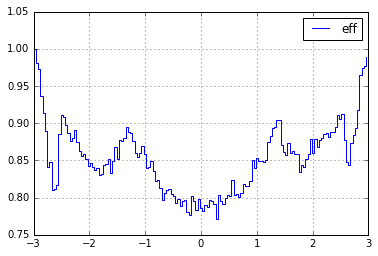

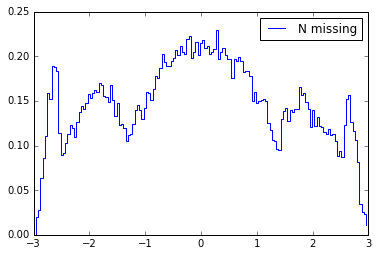

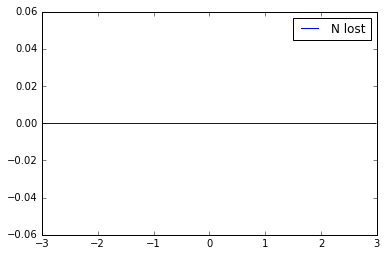

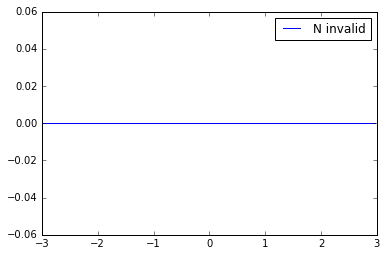

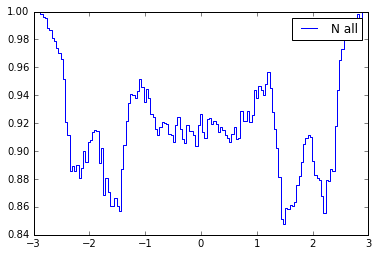

In [52]:
print tkPars[4][0],tkHits[0][0],tkHits[1][0],
eta=0
phi=1
pt=2
var = eta # phi
hp = np.greater(tkPars[2],1.)
valL2 = np.equal(tkHits[2],0)
#hp = hp&valL2
yv,x = np.histogram(tkPars[var],np.linspace(-3.,3.,150),weights=1.*hp*np.equal(tkHits[0],0)) 
yl,x = np.histogram(tkPars[var],np.linspace(-3.,3.,150),weights=1.*hp*np.equal(tkHits[0],1)) 
yi,x = np.histogram(tkPars[var],np.linspace(-3.,3.,150),weights=1.*hp*np.equal(tkHits[0],2)) 
ym,x = np.histogram(tkPars[var],np.linspace(-3.,3.,150),weights=1.*hp*np.less(tkHits[1],10)) 
ya=yv+ym+yl
y2,x = np.histogram(tkPars[var],np.linspace(-3.,3.,150),weights=1.*hp)
x.resize(len(yv))
plt.step(x,yv/ya,where='post',label='eff')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()
plt.step(x,ym/ya,where='post',label='N missing')
plt.legend(loc='upper right')
plt.show()
plt.step(x,yl/ya,where='post',label='N lost')
plt.legend(loc='upper right')
plt.show()
plt.step(x,yi/ya,where='post',label='N invalid')
plt.legend(loc='upper right')
plt.show()
plt.step(x,ya/y2,where='post',label='N all')
plt.legend(loc='upper right')
plt.show()